<div style="width: 100%; background-color: #222; text-align: center">
<br><br>

<h1 style="color: white; font-weight: bold;">
    Project
</h1>
    
<h3 style="color: #ef7d22; font-weight: normal;">
    Bagging and Boosting iris plants
</h3>

<br><br> 
</div>

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

In [1]:
# Import packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data using load_iris
X, y = load_iris(return_X_y=True)

# Split data into test and train - stratify on y
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=.2,random_state=42)

# Bagging (Random Forest Classifier)

In [3]:
# Create a Random Forest Classifier
# Tune with GridSearchCV or RandomizedSearchCV
# Create a grid with ranges of hyperparameter values
params = {
          'n_estimators':[100]+list(range(1000,10000,1000)), # default is 100
          'max_depth':list(range(5,10))+[None], # The higher the number the deeper the tree - None is the deepest - default is None
          'min_samples_split': [2,3,5], # The lower the number the deeper the tree - default is 2
          'min_samples_leaf': [1,2,3,5], # The lower the number the deeper the tree - default is 1
          'max_features': ['sqrt','log2',2,3,5], # default is 'auto'
          'max_samples': [None,0.7,0.5,0.4,0.3] # the number of samples for each bootstrap dataset - default is None
         }

# Instantiate a random forest instance
rf = RandomForestClassifier(n_jobs=-1,random_state=42,bootstrap=True,oob_score=True)

# Instantiate the randomized search instance
rand_rf= RandomizedSearchCV(estimator=rf,param_distributions=params,n_iter=100,cv=3,verbose=True,random_state=42,n_jobs=-1)

# Fit the randomized search instance to the train data
rand_rf.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                                    random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [5, 6, 7, 8, 9, None],
                                        'max_features': ['sqrt', 'log2', 2, 3,
                                                         5],
                                        'max_samples': [None, 0.7, 0.5, 0.4,
                                                        0.3],
                                        'min_samples_leaf': [1, 2, 3, 5],
                                        'min_samples_split': [2, 3, 5],
                                        'n_estimators': [100, 1000, 2000, 3000,
                                                         4000, 5000, 6000, 7000,
                                                         8000, 9000]},
                   random_state=42, verbose=True)

In [4]:
# Save the best params to a variable
best_params = rand_rf.best_params_
best_params

{'n_estimators': 5000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_samples': 0.5,
 'max_features': 'sqrt',
 'max_depth': 7}

In [6]:
# Instantiate a new random forest instance using the best params from the search
# Note: because this is a toy dataset, I could experiment with keeping my test set as a hold-out set and using oob_score to tune.
rf = RandomForestClassifier(n_jobs=-1,
                            random_state=42,
                            bootstrap=True,
                            oob_score=True,
                            n_estimators=best_params['n_estimators'],
                            min_samples_split=best_params['min_samples_split'],
                            min_samples_leaf=best_params['min_samples_leaf'],
                            max_samples=best_params['max_samples'],
                            max_features=best_params['max_features'],
                            max_depth=best_params['max_depth'])

# Fit the classifier on train data
rf.fit(X_train,y_train)


RandomForestClassifier(max_depth=7, max_features='sqrt', max_samples=0.5,
                       min_samples_split=5, n_estimators=5000, n_jobs=-1,
                       oob_score=True, random_state=42)

In [8]:
# Get the baseline accuracy of train data
pd.Series(y_train).value_counts()

0    40
1    40
2    40
dtype: int64

# What did you learn about baseline accuracy?
> there is no majority class so the baseline accuracy is just 1/3 since they are all the same size

In [9]:
# Scores for training accuracy
rf.score(X_train,y_train)


0.9833333333333333

In [10]:
# Score for test accuracy
rf.score(X_test,y_test)


0.9666666666666667

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

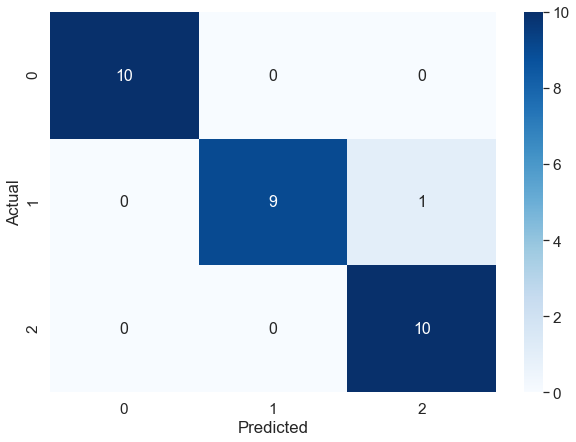

In [12]:
# Use a seaborn heatmap to visualize the categorical accuracy on the test set
# How is our model really performing?

from sklearn.metrics import confusion_matrix
# Create a confusion matrix with test data

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
# Put the confusion matrix in a data frame
df = pd.DataFrame(confusion_matrix(y_test,rf.predict(X_test)),columns=np.unique(y_test), index=np.unique(y_test))
# Change the index name to 'Actual'
df.index.name = 'Actual'
# Change the columns name to 'Predicted'
df.columns.name = 'Predicted'
# Make the figure size (10,7)
plt.figure(figsize=(10,7))
# Set the font_scale to 1.4
sns.set(font_scale=1.4)
# Use the heatmap to visualize the categorical accuracy
sns.heatmap(df, cmap='Blues', annot=True, annot_kws={'size': 16},fmt='g')

# Boosting (Gradient Boosting Classifier)

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

In [17]:
# Load data using load_iris
X, y = load_iris(return_X_y=True)

# Split data into test and train - stratify on y
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=.2,random_state=42)

In [18]:
# Build a gradient boosting classifier
# Tune hyperparameters using either GridSearchCV or RandomizedSearchCV
params = {
          'n_estimators':[100,1000,5000,10000,20000], # default is 100
          'learning_rate':[0.01,0.001,0.1,0.2,0.3], # default is 0.1
          'subsample':[0.2,0.5,0.75,1.0], # default is 1
          'max_depth':[3,5,None], # default is 3
          'max_features':[3,5,'auto','sqrt','log2',None] # default is 'auto'
         }

In [19]:
# Instantiate a gradient boosting classifier
gbc = GradientBoostingClassifier(loss='deviance',criterion='friedman_mse',random_state=42,validation_fraction=0.2,n_iter_no_change=3)

# Instantiate a hyperparameter search instance
rand_gbc = RandomizedSearchCV(estimator=gbc,param_distributions=params,random_state=42,cv=3,verbose=2,n_jobs=-1)

# Fit the search instance to train data
rand_gbc.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=GradientBoostingClassifier(n_iter_no_change=3,
                                                        random_state=42,
                                                        validation_fraction=0.2),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.001, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [3, 5, None],
                                        'max_features': [3, 5, 'auto', 'sqrt',
                                                         'log2', None],
                                        'n_estimators': [100, 1000, 5000, 10000,
                                                         20000],
                                        'subsample': [0.2, 0.5, 0.75, 1.0]},
                   random_state=42, verbose=2)

In [20]:
# Save the best hyperparameters to a variable
best_params = rand_gbc.best_params_
best_params

{'subsample': 0.75,
 'n_estimators': 1000,
 'max_features': 'auto',
 'max_depth': 3,
 'learning_rate': 0.2}

In [21]:
# Instantiate a new classifier using the best hyperparameters found
gbc = GradientBoostingClassifier(
    loss='deviance',
    criterion='friedman_mse',
    random_state=42,
    validation_fraction=0.2,
    n_iter_no_change=3,
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample'],
    max_depth=best_params['max_depth'],
    max_features=best_params['max_features'])

# Fit on train data
gbc.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.2, max_features='auto',
                           n_estimators=1000, n_iter_no_change=3,
                           random_state=42, subsample=0.75,
                           validation_fraction=0.2)

In [22]:
# Get scores for train and test data
gbc.score(X_train,y_train),gbc.score(X_test,y_test)

(0.9916666666666667, 0.9666666666666667)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

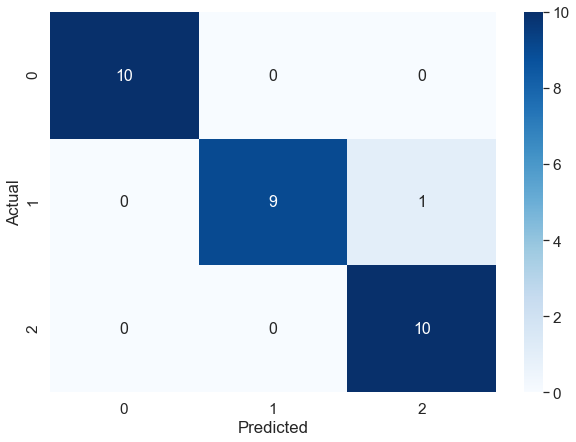

In [24]:
# Use a seaborn heatmap to visualize the categorical accuracy on the test set
# How is our model really performing?

from sklearn.metrics import confusion_matrix
# Create a confusion matrix with test data

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
# Put the confusion matrix in a data frame
df = pd.DataFrame(confusion_matrix(y_test,gbc.predict(X_test)), columns=np.unique(y_test), index=np.unique(y_test))
# Change the index name to 'Actual'
df.index.name = 'Actual'
# Change the columns name to 'Predicted'
df.columns.name = 'Predicted'
# Make the figure size (10,7)
plt.figure(figsize=(10,7))
# Set the font_scale to 1.4
sns.set(font_scale=1.4)
# Use the heatmap to visualize the categorical accuracy
sns.heatmap(df, cmap='Blues', annot=True, annot_kws={'size':16}, fmt='g')